In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
class gradient_bandit:
    def __init__(self, step_size, baseline, initial, k = 10):
        self.step_size = step_size
        self.k = k
        self.actions = np.array(range(k))
        self.time = 0
        self.action_probs = np.zeros(k)
        self.q_true = np.random.randn(k) + initial
        self.q_estimates = np.zeros(k) + initial
        self.baseline = baseline
        self.average_reward = 0
        self.times_taken = np.zeros(k)
        self.initial = initial
    
    def select_action(self):
        self.action_probs = np.exp(self.q_estimates)/np.sum(np.exp(self.q_estimates))
        return np.random.choice(self.actions, p = self.action_probs)
    
    def step(self, action):
        # Make one-hot vector for action
        one_hot = np.zeros(self.k)
        one_hot[action] = 1
    
        # Get reward
        reward = np.random.normal(self.q_true[action], 1)
        
        # Increment time, times_taken[action]
        self.time += 1
        self.times_taken[action] += 1
        
        #Update average reward
        #self.average_reward += self.step_size(reward - self.q_estimates[action])
        self.average_reward = (self.time - 1.0)/self.time*self.average_reward+reward/self.time
        
        if self.baseline == True:
            baseline = self.average_reward
        
        if self.baseline == False:
            baseline = 0
        
        # Update preferences
        self.q_estimates += self.step_size*(reward - baseline)*(one_hot - self.action_probs)
        
        return reward
        
    # Reset bandit at the beginning of every run
    def reset(self):
        
        self.q_true = np.random.randn(self.k) + self.initial
        
        self.q_estimates = np.zeros(self.k) + self.initial
        
        self.times_taken = np.zeros(self.k)
        
        self.best_action = np.argmax(self.q_true)

        
              

In [23]:
def simulate(runs, time, bandits):
    best_action_counts = np.zeros((len(bandits), runs, time))
    rewards = np.zeros(best_action_counts.shape)
    for i, bandit in enumerate(bandits):
        for r in tqdm(range(runs)):
            bandit.reset()
            for t in range(time):
                action = bandit.select_action()
                reward = bandit.step(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1
    best_action_counts = best_action_counts.mean(axis = 1)
    rewards = rewards.mean(axis = 1)
    return best_action_counts, rewards
 

In [24]:
def figure_2_4(runs=2000, time=1000):
    bandits = []
    bandits.append(gradient_bandit(step_size=0.1, baseline=False, initial = 4))
    bandits.append(gradient_bandit(step_size=0.4, baseline = False, initial = 4))
    bandits.append(gradient_bandit(step_size=0.1, baseline= True, initial = 4))
    bandits.append(gradient_bandit(step_size=0.4, baseline= True, initial = 4))
    best_action_counts, rewards = simulate(runs, time, bandits)

    plt.figure(figsize=(10,10))

    plt.plot(best_action_counts[0], label='Without Baseline step size = 0.1')
    plt.plot(best_action_counts[1], label='Without Baseline step size = 0.4')
    plt.plot(best_action_counts[2], label='With Baseline step size =0.1')
    plt.plot(best_action_counts[3], label='With Baseline step size=0.4')
    plt.xlabel('steps')
    plt.ylabel('% optimal action')
    plt.legend()
    
    plt.show()


100%|██████████| 2000/2000 [01:23<00:00, 24.02it/s]


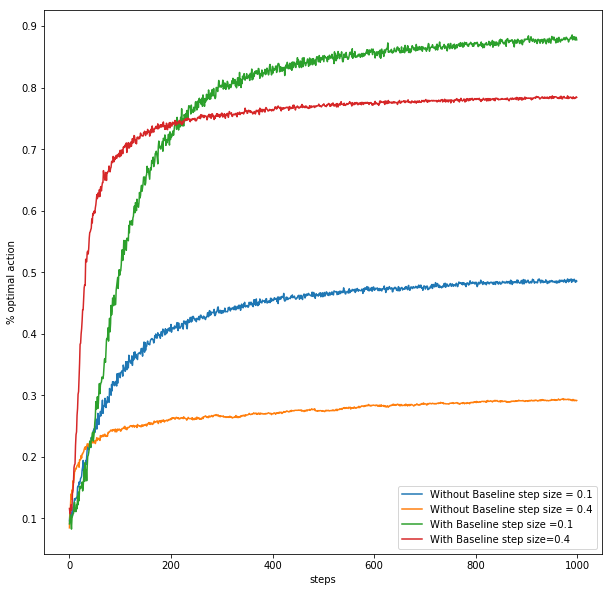

In [25]:
figure_2_4()